In [ ]:
from sklearn import datasets
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import random

from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn import model_selection
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score

colors = ListedColormap(['red', 'blue'])
light_colors = ListedColormap(['lightcoral', 'lightblue'])

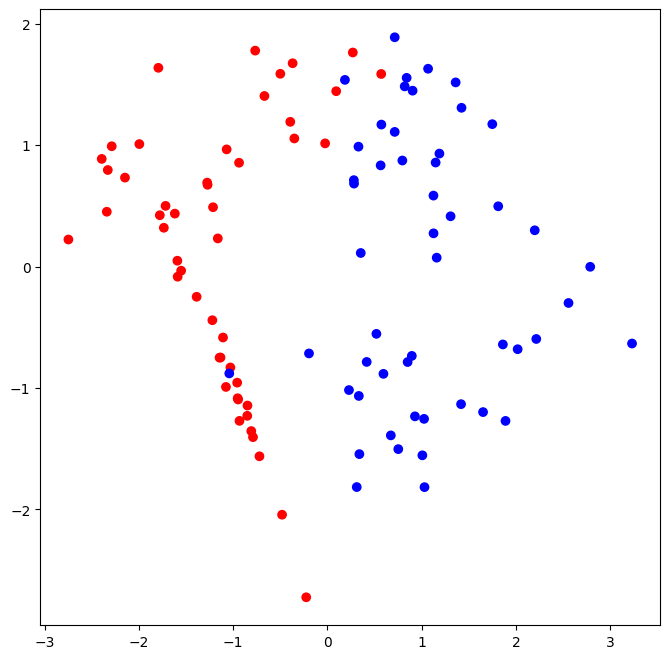

Размер массива признаков обучающей выборки (70, 2)
Размер массива признаков тестовой выборки (30, 2)
Размер массива ответов для обучающей выборки (70,)
Размер массива ответов для тестовой выборки (30,)


In [ ]:
classes = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=5)


plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)

plt.show()


np.random.seed(12)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]



train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]

print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

X_train_tr = X_train.transpose()
y_train_tr = y_train.reshape(-1, 1)
X_test_tr = X_test.transpose()
y_test_tr = y_test.reshape(-1, 1)

In [ ]:
# Логистическая функция (сигмоида)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Функция потерь и градиент
def log_loss(w, X, y):
    m = X.shape[1]
    z = np.dot(w.T, X)
    y_pred = sigmoid(z)

    loss = -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / m
    grad = np.dot(X, (y_pred - y.T).T) / m

    return loss, grad

# Функция оптимизации
def optimize(w, X, y, n_iterations, eta):
    losses = []
    for i in range(n_iterations):
        loss, grad = log_loss(w, X, y)
        w -= eta * grad
        losses.append(loss)

    return w, losses

# Функция предсказания
def log_predict(w, X, b=0.5):
    z = np.dot(w.T, X)
    probabilities = sigmoid(z)
    y_predicted = (probabilities >= b).astype(int)
    return y_predicted.T



In [ ]:
def evaluate_metrics(true_labels, predicted_labels):
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')

    return accuracy, precision, recall

In [ ]:
# Инициализация начального вектора весов
w0 = np.zeros((X_train_tr.shape[0], 1))

n_iterations = 1000
eta = 0.05

# Оптимизация весов
w, losses = optimize(w0, X_train_tr, y_train_tr, n_iterations, eta)

# Предсказания
y_predicted_test = log_predict(w, X_test_tr)
y_predicted_train = log_predict(w, X_train_tr)

# Приведение предсказаний к бинарному формату (0 или 1)
y_predicted_test_binary = (y_predicted_test >= 0.5).astype(int)
y_predicted_train_binary = (y_predicted_train >= 0.5).astype(int)

# В качестве меры точности возьмём долю правильных ответов
train_accuracy = 1.0 - np.mean(np.abs(y_predicted_train - y_train_tr))
test_accuracy = 1.0 - np.mean(np.abs(y_predicted_test - y_test_tr))

# Precision и Recall для обучающей выборки
train_precision = precision_score(y_train_tr, y_predicted_train_binary, average='binary')
train_recall = recall_score(y_train_tr, y_predicted_train_binary, average='binary')

# Precision и Recall для тестовой выборки
test_precision = precision_score(y_test_tr, y_predicted_test_binary, average='binary')
test_recall = recall_score(y_test_tr, y_predicted_test_binary, average='binary')

# Вывод результатов
print(f"Accuracy на обучающей выборке: {train_accuracy:.3f}")
print(f"Precision на обучающей выборке: {train_precision:.3f}")
print(f"Recall на обучающей выборке: {train_recall:.3f}")

print(f"Accuracy на тестовой выборке: {test_accuracy:.3f}")
print(f"Precision на тестовой выборке: {test_precision:.3f}")
print(f"Recall на тестовой выборке: {test_recall:.3f}")


Accuracy на обучающей выборке: 0.957
Precision на обучающей выборке: 0.921
Recall на обучающей выборке: 1.000
Accuracy на тестовой выборке: 0.933
Precision на тестовой выборке: 1.000
Recall на тестовой выборке: 0.875


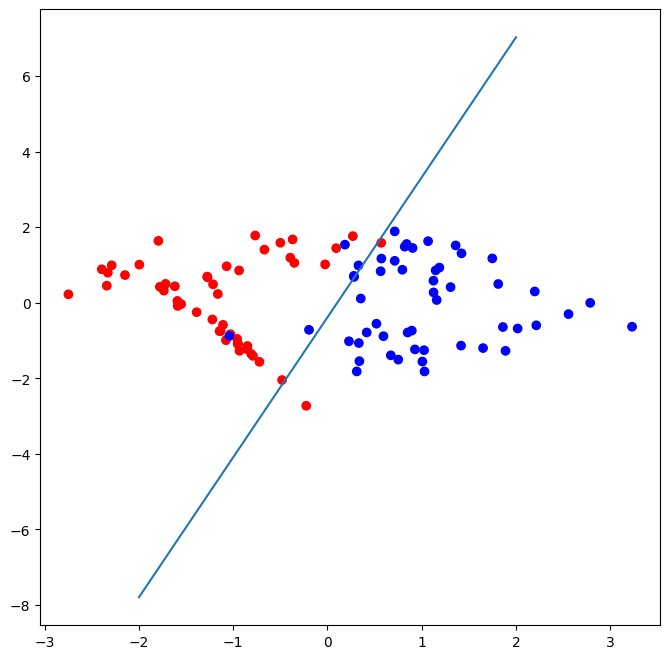

In [ ]:
data = np.linspace(-2, 2, 100)

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.plot(data, w[0,0]*data+w[1,0])

plt.show()

In [ ]:
random.seed(28)

def get_bootstrap(data, labels, N):
    n_samples = data.shape[0]
    bootstrap = []

    for i in range(N):
        unique_indices = np.random.choice(range(n_samples), size=int(0.6 * n_samples), replace=False)

        remaining_size = n_samples - len(unique_indices)
        additional_indices = np.random.choice(unique_indices, size=remaining_size, replace=True)

        final_indices = np.concatenate([unique_indices, additional_indices])
        np.random.shuffle(final_indices)

        b_data = data[final_indices]
        b_labels = labels[final_indices]

        bootstrap.append((b_data, b_labels))

    return bootstrap

def get_subsample(len_sample):
    # будем сохранять не сами признаки, а их индексы
    sample_indexes = [i for i in range(len_sample)]

    len_subsample = int(np.sqrt(len_sample))
    subsample = random.sample(sample_indexes, len_subsample)
    return subsample

# Расчёт критерия Джини
def gini(labels):
    classes, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    impurity = 1 - np.sum(probabilities ** 2)
    return impurity

# Расчёт качества разбиения
def quality(left_labels, right_labels, current_gini):
    left_weight = len(left_labels) / (len(left_labels) + len(right_labels))
    right_weight = len(right_labels) / (len(left_labels) + len(right_labels))
    gini_split = left_weight * gini(left_labels) + right_weight * gini(right_labels)
    return current_gini - gini_split

# Разбиение выборки на две части
def split(data, labels, index, t):
    true_mask = data[:, index] <= t
    false_mask = ~true_mask
    true_data, false_data = data[true_mask], data[false_mask]
    true_labels, false_labels = labels[true_mask], labels[false_mask]
    return true_data, false_data, true_labels, false_labels

def find_best_split(data, labels):
    min_leaf = 5
    best_quality = -1
    best_t = None
    best_index = None

    current_gini = gini(labels)

    for index in range(data.shape[1]):
        thresholds = np.unique(data[:, index])
        for t in thresholds:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

            if len(true_labels) < min_leaf or len(false_labels) < min_leaf:
                continue

            current_quality = quality(true_labels, false_labels, current_gini)

            if current_quality > best_quality:
                best_quality = current_quality
                best_t = t
                best_index = index

    return best_quality, best_t, best_index


class Node:

    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведётся сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

# Реализуем класс листа
class Leaf:

    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()

    def predict(self):
        classes, counts = np.unique(self.labels, return_counts=True)
        return classes[np.argmax(counts)]

# Построение дерева посредством рекурсивной функции
def build_tree(data, labels):
    best_quality, best_t, best_index = find_best_split(data, labels)

    if best_quality < 1e-6:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, best_index, best_t)

    true_branch = build_tree(true_data, true_labels)
    false_branch = build_tree(false_data, false_labels)

    return Node(best_index, best_t, true_branch, false_branch)

# Проход объекта по дереву для его классификации
def classify_object(obj, node):
    if isinstance(node, Leaf):
        return node.prediction

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

# Предсказание деревом для всего датасета
def predict(data, tree):
    predictions = [classify_object(obj, tree) for obj in data]
    return np.array(predictions)

def tree_vote(forest, data):
    predictions = np.array([predict(data, tree) for tree in forest])

    voted_predictions = np.apply_along_axis(
        lambda x: np.bincount(x).argmax(), axis=0, arr=predictions
    )

    return voted_predictions

# Реализация случайного леса
def random_forest(data, labels, n_trees):
    forest = []
    bootstrap = get_bootstrap(data, labels, n_trees)

    for b_data, b_labels in bootstrap:
        tree = build_tree(b_data, b_labels)
        forest.append(tree)

    return forest


In [ ]:
classification_data, classification_labels = datasets.make_classification(n_samples=500,
                                                      n_features = 2, n_informative = 2,
                                                      n_classes = 2, n_redundant=0,
                                                      n_clusters_per_class=1, random_state=5)

train_data, test_data, train_labels, test_labels = model_selection.train_test_split(classification_data,
                                                                                     classification_labels,
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

In [ ]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
      if actual[i] == predicted[i]:
        correct += 1
    return correct / float(len(actual)) * 100.0

In [ ]:
n_trees = 3
my_forest_1 = random_forest(train_data, train_labels, n_trees)

# Получим ответы для обучающей выборки
train_answers = tree_vote(my_forest_1, train_data)

# И получим ответы для тестовой выборки
test_answers = tree_vote(my_forest_1, test_data)

train_accuracy, train_precision, train_recall = evaluate_metrics(train_labels, train_answers)
print(f'Обучающая выборка: Accuracy: {train_accuracy:.3f}, Precision: {train_precision:.3f}, Recall: {train_recall:.3f}')

test_accuracy, test_precision, test_recall = evaluate_metrics(test_labels, test_answers)
print(f'Тестовая выборка: Accuracy: {test_accuracy:.3f}, Precision: {test_precision:.3f}, Recall: {test_recall:.3f}')


Обучающая выборка: Accuracy: 0.989, Precision: 0.989, Recall: 0.989
Тестовая выборка: Accuracy: 0.947, Precision: 0.948, Recall: 0.947


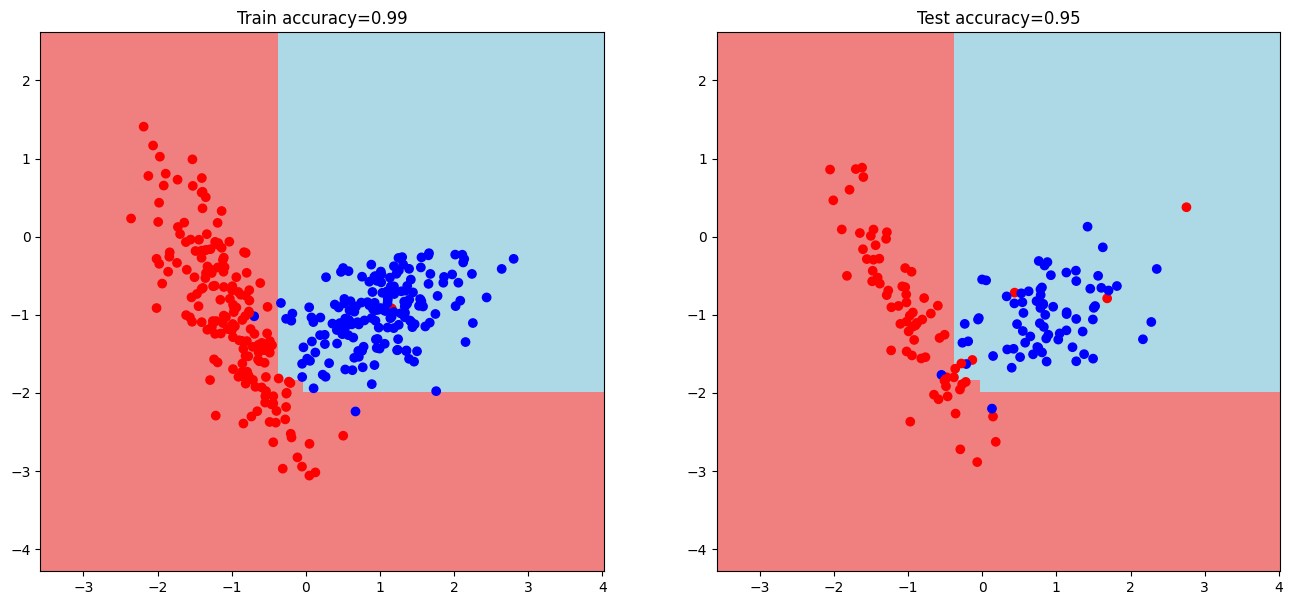

In [ ]:
# Визуализируем дерево на графике

def get_meshgrid(data, step=.05, border=1.2):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

plt.figure(figsize = (16, 7))

# график обучающей выборки
plt.subplot(1,2,1)
xx, yy = get_meshgrid(train_data)

mesh_predictions = np.array(tree_vote(my_forest_1, np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)

plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, cmap = colors)
plt.title(f'Train accuracy={train_accuracy:.2f}')

# график тестовой выборки
plt.subplot(1,2,2)
plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, cmap = colors)
plt.title(f'Test accuracy={test_accuracy:.2f}')
plt.show()

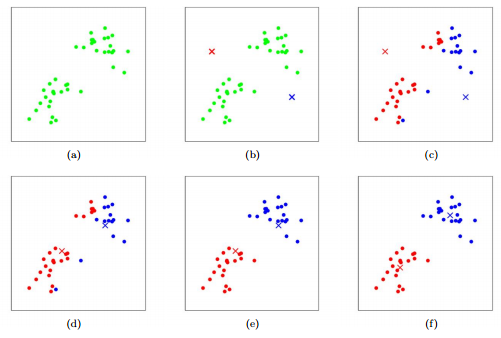![image.png]()

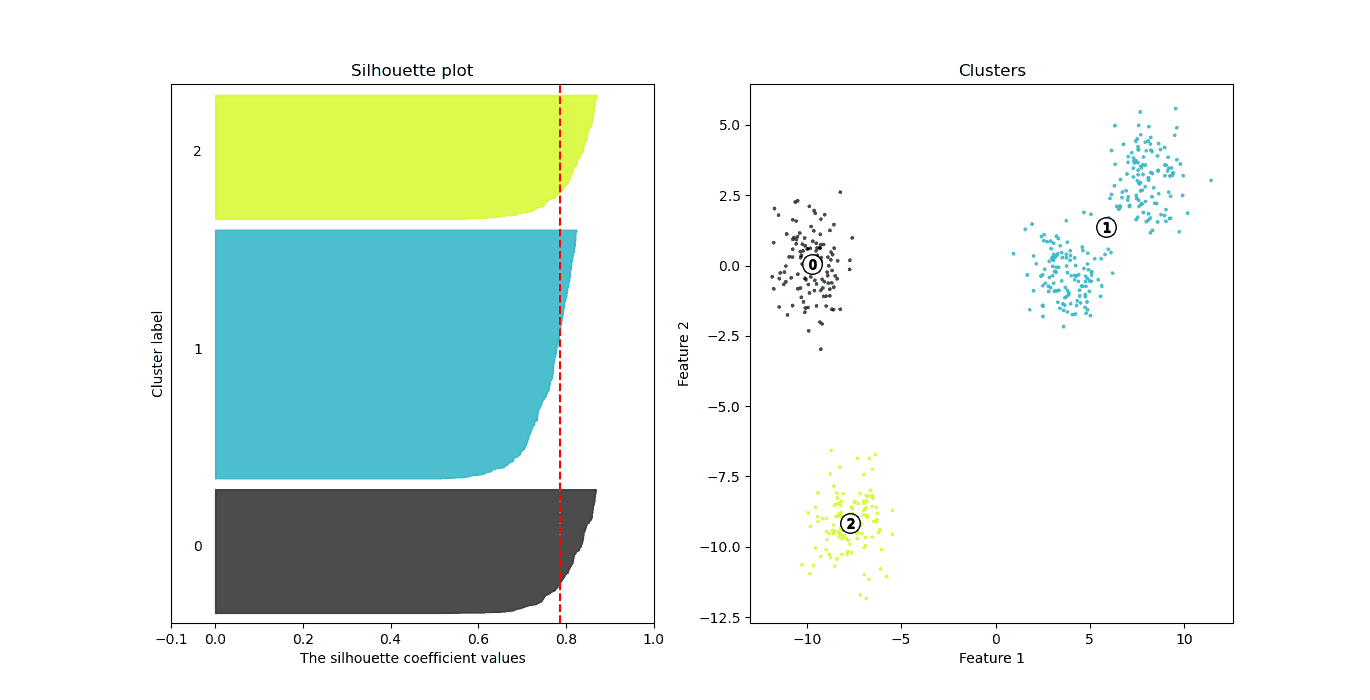

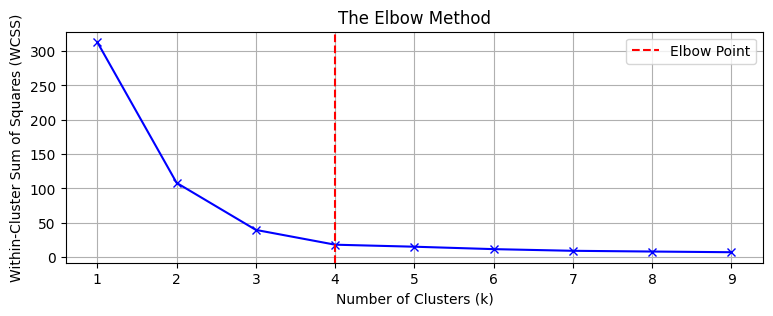

3. MAE MSE R2

4. Нормализация (MinMax)
Стандартизация (Standard)